### Statistics with Scipy

### Iris Dataset:
Fisher RA. The use of multiple measurements in taxonomic problems. Annals of Eugenics 1936; 7 (2): 179–188

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Loading the data

In [4]:
dataset = pd.read_csv('data/iris_dataset.csv', sep=',', na_values=["."," ","na"])

In [5]:
dataset.shape

(150, 5)

In [6]:
dataset.columns

Index(['Type', 'Petal_Width', 'Petal_Length', 'Sepal_Width', 'Sepal_Length'], dtype='object')

In [7]:
dataset.head(10)

,Type,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
0,setosa,2,14,33,50
1,virginica,24,56,31,67
2,virginica,23,51,31,69
3,setosa,2,10,36,46
4,virginica,20,52,30,65
5,virginica,19,51,27,58
6,versicolor,13,45,28,57
7,versicolor,16,47,33,63
8,virginica,17,45,25,49
9,versicolor,14,47,32,70


Exploratory analysis

In [8]:
dataset.describe(percentiles=[.25, .5, .75], include='all')

,Type,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
count,150,150.000000,150.000000,150.000000,150.000000
unique,3,NaN,NaN,NaN,NaN
top,setosa,NaN,NaN,NaN,NaN
freq,50,NaN,NaN,NaN,NaN
mean,NaN,11.926667,37.786667,30.553333,58.446667
std,NaN,7.569008,17.776233,4.372791,8.268592
min,NaN,1.000000,10.000000,20.000000,43.000000
25%,NaN,3.000000,16.000000,28.000000,51.000000
50%,NaN,13.000000,44.000000,30.000000,58.000000
75%,NaN,18.000000,51.000000,33.000000,64.000000


In [9]:
grouped_iris = dataset.groupby('Type')
grouped_iris.mean()

,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
Type,,,,
setosa,2.46,14.62,34.28,50.10
versicolor,13.26,43.22,27.64,59.36
virginica,20.06,55.52,29.74,65.88


In [13]:
group_iris_des = grouped_iris.describe(percentiles=[.25, .5, .75], include='all') # grouped with type with 25th, 50th, and 75th percentiles

In [14]:
group_iris_des

Petal_Width                                                  \
                 count   mean       std   min   25%   50%    75%   max   
Type                                                                     
setosa            50.0   2.46  1.053856   1.0   2.0   2.0   3.00   6.0   
versicolor        50.0  13.26  1.977527  10.0  12.0  13.0  15.00  18.0   
virginica         50.0  20.06  2.902567  13.0  18.0  20.0  22.75  25.0   

           Petal_Length         ... Sepal_Width       Sepal_Length         \
                  count   mean  ...         75%   max        count   mean   
Type                            ...                                         
setosa             50.0  14.62  ...       36.75  44.0         50.0  50.10   
versicolor         50.0  43.22  ...       30.00  34.0         50.0  59.36   
virginica          50.0  55.52  ...       31.75  38.0         50.0  65.88   

                                                     
                 std   min    25%   50%   75%   max  
Type                                                 
setosa      3.535534  43.0  48.00  50.0  52.0  58.0  
versicolor  5.161711  49.0  56.00  59.0  63.0  70.0  
virginica   6.358796  49.0  62.25  65.0  69.0  79.0  

[3 rows x 32 columns]

Type
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Petal_Width, dtype: object

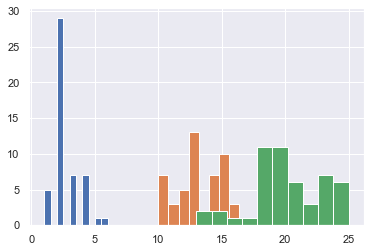

In [15]:
grouped_iris['Petal_Width'].hist()

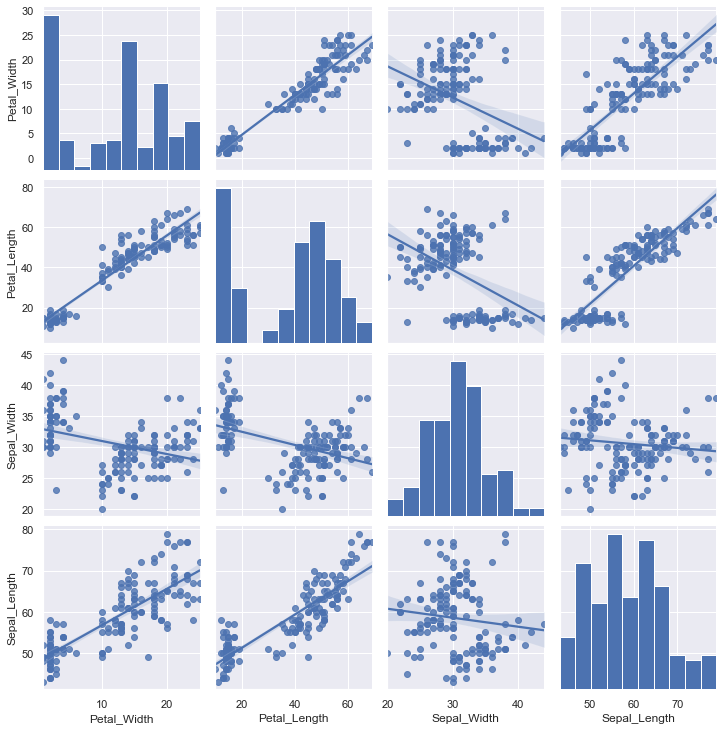

In [16]:
sns.pairplot(dataset, kind='reg')

In [17]:
dataset[dataset['Type']=='setosa'].head(10)

,Type,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
0,setosa,2,14,33,50
3,setosa,2,10,36,46
10,setosa,2,16,31,48
12,setosa,1,14,36,49
13,setosa,2,13,32,44
17,setosa,2,16,38,51
18,setosa,2,16,30,50
20,setosa,4,19,38,51
21,setosa,2,14,30,49
24,setosa,2,14,36,50


In [18]:
dataset[dataset['Type']=='setosa']['Petal_Length'].head(10)

0     14
3     10
10    16
12    14
13    13
17    16
18    16
20    19
21    14
24    14
Name: Petal_Length, dtype: int64

Separate variables petal and sepal characteristics of each type

In [20]:
pl_setosa = dataset[dataset['Type']=='setosa']['Petal_Length']
pl_virginica = dataset[dataset['Type']=='virginica']['Petal_Length']
pl_versicolor = dataset[dataset['Type']=='versicolor']['Petal_Length']

pw_setosa = dataset[dataset['Type']=='setosa']['Petal_Width']
pw_virginica = dataset[dataset['Type']=='virginica']['Petal_Width']
pw_versicolor = dataset[dataset['Type']=='versicolor']['Petal_Width']

sl_setosa = dataset[dataset['Type']=='setosa']['Sepal_Length']
sl_virginica = dataset[dataset['Type']=='virginica']['Sepal_Length']
sl_versicolor = dataset[dataset['Type']=='versicolor']['Sepal_Length']

sw_setosa = dataset[dataset['Type']=='setosa']['Sepal_Width']
sw_virginica = dataset[dataset['Type']=='virginica']['Sepal_Width']
sw_versicolor = dataset[dataset['Type']=='versicolor']['Sepal_Width']

In [21]:
type(sw_setosa)

pandas.core.series.Series

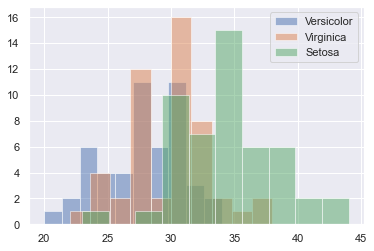

In [22]:
plt.hist(sw_versicolor, label='Versicolor', alpha=0.5)
plt.hist(sw_virginica, label='Virginica', alpha=0.5)
plt.hist(sw_setosa, label='Setosa', alpha=0.5)
plt.legend(loc='best')

Normality Testing

Kolmogorov-Smirnov test

In [23]:
ks_pl_setosa = stats.kstest(pl_setosa, 'norm', mode='asymp')
ks_pl_setosa[1]

7.440151952041566e-44

Shapiro test

In [25]:
shapiro_pw_setosa = stats.shapiro(pw_setosa)
shapiro_pw_setosa

ShapiroResult(statistic=0.7997642159461975, pvalue=8.65842082475865e-07)

Normal test: Combines skew and kurtosis measurement

In [26]:
nt_sl_setosa = stats.normaltest(sl_setosa, nan_policy='omit')
nt_sl_setosa

NormaltestResult(statistic=0.16963916001883134, pvalue=0.9186780173294777)

Anderson test: Modified KS, returns critical values for a list of significance levels

In [27]:
anderson_sw_setosa = stats.anderson(sw_setosa, dist='norm')
anderson_sw_setosa

AndersonResult(statistic=0.49095595829555094, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Contingency Tables

Chi square, 
Fisher's exact test

In [28]:
mean_pw = dataset['Petal_Width'].mean()
mean_sw = dataset['Sepal_Width'].mean()

width_table = pd.crosstab(dataset.Petal_Width > mean_pw, dataset.Sepal_Width > mean_sw)
width_table

Sepal_Width,False,True
Petal_Width,,
False,18,42
True,65,25


Chi square

In [29]:
chi2_width = stats.chi2_contingency(width_table, correction=False)
print(chi2_width)
print('\n')
print(' Chi-square value: ', chi2_width[0], '\n',
      'p-value: ', chi2_width[1], '\n',
      'Degrees of freedom: ', chi2_width[2], '\n',
      'Expected frequencies: ', chi2_width[3], '\n')

(25.966552778277293, 3.473840254460744e-07, 1, array([[33.2, 26.8],
       [49.8, 40.2]]))


 Chi-square value:  25.966552778277293 
 p-value:  3.473840254460744e-07 
 Degrees of freedom:  1 
 Expected frequencies:  [[33.2 26.8]
 [49.8 40.2]] 



Fisher's exact test

In [30]:
fisher_width = stats.fisher_exact([[18,42],
                                   [65,25]], alternative='two-sided')
print(fisher_width)
print('\n')
print(' Odds ratio: ', fisher_width[0], '\n',
      'p-value: ', fisher_width[1])

(0.16483516483516483, 3.90295578087731e-07)


 Odds ratio:  0.16483516483516483 
 p-value:  3.90295578087731e-07


Correlation

Pearson's correlation coefficient

In [31]:
pearson_petal = stats.pearsonr(dataset['Petal_Width'], dataset['Petal_Length'])
print(pearson_petal,'\n')
print('Pearson\'s correlation coefficient: ', pearson_petal[0])
print('p-value: ', pearson_petal[1])

(0.955901892949159, 1.2082268268088476e-80) 

Pearson's correlation coefficient:  0.955901892949159
p-value:  1.2082268268088476e-80
